# Random Forest Classification-Ensemble Technique-Bagging

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Read The train_titanic.csv 

In [2]:
import pandas as pd
df=pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Missing Values

In [4]:
s=df.isna().sum()
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Check for duplicates

In [5]:
df.duplicated().sum()

0

### Seperate X AND Y (SURVIVED)
survived~ Remaining Feature

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
X=df.drop(columns=['PassengerId','Name','Ticket','Survived'])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
X.mean(numeric_only=True)

Pclass     2.308642
Age       29.699118
SibSp      0.523008
Parch      0.381594
Fare      32.204208
dtype: float64

In [9]:
X.median(numeric_only=True)

Pclass     3.0000
Age       28.0000
SibSp      0.0000
Parch      0.0000
Fare      14.4542
dtype: float64

In [10]:
Y=df[['Survived']]
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [11]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

### Seperate CAT AND CON FEATURES FOR X

In [12]:
cat=list(X.columns[X.dtypes=='object'])
con=list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Sex', 'Cabin', 'Embarked']

In [14]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## Create a preprocessing Pipleline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
# Numeric Pipeline 
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('scaler',StandardScaler())])
#Categorical Pipeline
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='Unknown')),
                         ('ohe',OneHotEncoder(handle_unknown='ignore'))])
#combine Pipeline with  Column Transformer
pre=ColumnTransformer([('num',num_pipe,con),
                       ('cat',cat_pipe,cat)])

In [18]:
X_pre=pre.fit_transform(X).toarray()
X_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ]])

In [19]:
cols=pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Cabin_A10',
       'cat__Cabin_A14', 'cat__Cabin_A16', 'cat__Cabin_A19',
       'cat__Cabin_A20', 'cat__Cabin_A23', 'cat__Cabin_A24',
       'cat__Cabin_A26', 'cat__Cabin_A31', 'cat__Cabin_A32',
       'cat__Cabin_A34', 'cat__Cabin_A36', 'cat__Cabin_A5',
       'cat__Cabin_A6', 'cat__Cabin_A7', 'cat__Cabin_B101',
       'cat__Cabin_B102', 'cat__Cabin_B18', 'cat__Cabin_B19',
       'cat__Cabin_B20', 'cat__Cabin_B22', 'cat__Cabin_B28',
       'cat__Cabin_B3', 'cat__Cabin_B30', 'cat__Cabin_B35',
       'cat__Cabin_B37', 'cat__Cabin_B38', 'cat__Cabin_B39',
       'cat__Cabin_B4', 'cat__Cabin_B41', 'cat__Cabin_B42',
       'cat__Cabin_B49', 'cat__Cabin_B5', 'cat__Cabin_B50',
       'cat__Cabin_B51 B53 B55', 'cat__Cabin_B57 B59 B63 B66',
       'cat__Cabin_B58 B60', 'cat__Cabin_B69', 'cat__Cabin_B71',
       'cat__Cabin_B73', 'cat__Cabin_B77', 'cat__Cabin_B78',
       '

In [20]:
X_pre=pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_Unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_Unknown
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [22]:
xtrain.shape

(712, 159)

In [23]:
xtest.shape

(179, 159)

## Create a Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1,max_depth=2,min_samples_split=3,min_samples_leaf=1,criterion='entropy')
model.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=3,
                       n_estimators=1)

In [25]:
# Accuray score in training
model.score(xtrain,ytrain)

0.6587078651685393

In [26]:
# Accurcy score in testing
model.score(xtest,ytest)

0.6480446927374302

## HYPERPARAMETER TUNING

In [27]:
params={'n_estimators':[10,50,100,200],
        'max_depth':[2,3,4,5,6,7,8],
        'min_samples_split':[5,6,7,8,9],
        'criterion':['gini','entropy']}

In [28]:
from sklearn.model_selection import RandomizedSearchCV
rfc=RandomForestClassifier()
rscv=RandomizedSearchCV(rfc,param_distributions=params,cv=5,scoring='f1')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1')

In [29]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'max_depth': 7,
 'criterion': 'entropy'}

In [30]:
rscv.best_score_

0.7242327100344236

In [31]:
best_rfc=rscv.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=8,
                       n_estimators=200)

## Evaluate MODEL ACCURACY

In [32]:
best_rfc.score(xtrain,ytrain)

0.8539325842696629

In [33]:
best_rfc.score(xtest,ytest)

0.8156424581005587

## Predict train and test data

In [34]:
ypred_tr=best_rfc.predict(xtrain)
ypred_ts=best_rfc.predict(xtest)

In [35]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [36]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [37]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [38]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


## CONFUSION MATRIX

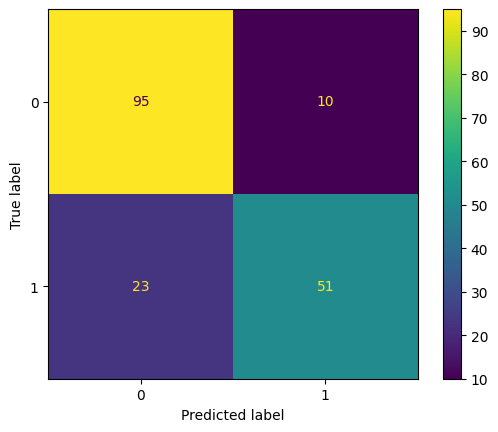

In [39]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=best_rfc.classes_)
cfd.plot()

## CHECK CLASSIFICATION REPORT

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



# Get feature importances

In [42]:
imp=best_rfc.feature_importances_
imp=pd.Series(imp)
imp.index=xtrain.columns
imp=imp.sort_values(ascending=False)
imp

cat__Sex_female    0.218578
cat__Sex_male      0.202441
num__Fare          0.111285
num__Pclass        0.105223
num__Age           0.086055
                     ...   
cat__Cabin_D48     0.000000
cat__Cabin_D47     0.000000
cat__Cabin_D15     0.000000
cat__Cabin_E49     0.000000
cat__Cabin_B39     0.000000
Length: 159, dtype: float64

<Axes: title={'center': 'Feature Importances'}>

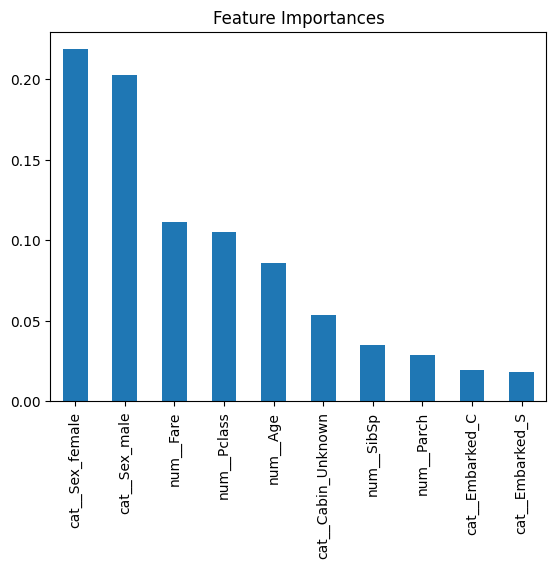

In [43]:
imp[0:10].plot(kind='bar',title='Feature Importances')

## PEDICTING FOR TEST_TITANIC

In [44]:
xnew=pd.read_csv('test_titanic.csv')
xnew

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [47]:
xnew_pre=pre.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  1.35550962,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  0.        ]])

In [48]:
xnew_pre=pd.DataFrame(xnew_pre,columns=cols)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_Unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_Unknown
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
#PREDICIING THE RESULTS
preds=best_rfc.predict(xnew_pre)
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [50]:
prob=best_rfc.predict_proba(xnew_pre)[:,1]
prob

array([0.15405972, 0.45637377, 0.20782748, 0.1565655 , 0.52742945,
       0.16039823, 0.57031065, 0.26695409, 0.62316424, 0.16521249,
       0.14874503, 0.2475718 , 0.78909092, 0.22027343, 0.7707198 ,
       0.75649526, 0.20729078, 0.22119394, 0.45079256, 0.58745825,
       0.32769372, 0.24793671, 0.70622287, 0.37236993, 0.84990265,
       0.16947013, 0.83988221, 0.22119394, 0.33238088, 0.22877176,
       0.22808453, 0.23866832, 0.5015573 , 0.41773851, 0.43500491,
       0.25872671, 0.44101151, 0.44536245, 0.15408216, 0.25835657,
       0.29505738, 0.33104871, 0.13392625, 0.70934056, 0.77645847,
       0.15706461, 0.39810417, 0.17513965, 0.842401  , 0.52261449,
       0.36486744, 0.26096037, 0.71898381, 0.78390184, 0.25858584,
       0.13575945, 0.13557492, 0.22966106, 0.1849038 , 0.845328  ,
       0.14771985, 0.21390151, 0.15006404, 0.60493783, 0.57247633,
       0.68817597, 0.58806646, 0.26254399, 0.39110326, 0.71380385,
       0.60678973, 0.1479787 , 0.46011806, 0.39072348, 0.84345

## saving preds and prob in dataframe


In [51]:
df_final=xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [52]:
df_final['Survived_pred']=preds 
df_final['Survived_prob']=prob

In [53]:
df_final

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.154060
1,893,0,0.456374
2,894,0,0.207827
3,895,0,0.156565
4,896,1,0.527429
...,...,...,...
413,1305,0,0.150815
414,1306,1,0.846985
415,1307,0,0.134102
416,1308,0,0.150815


In [54]:
df_final.to_csv('Results.csv',index=False)
